# NSL-KDD Dataset preparation

In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [ ]:
#train_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/NSL_KDD_Train.csv'
#test_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/NSL_KDD_Test.csv'

train_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]


df_bef = pd.read_csv(train_url,header=None, names = col_names)

df_before = pd.read_csv(test_url, header=None, names = col_names)



In [ ]:
df_before.drop(['difficulty'],axis=1,inplace=True)
#df_test.drop(['difficulty'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df_bef, test_size=0.96, random_state=12)

In [ ]:
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

df.head()



Dimensions of the Training set: (5038, 43)
Dimensions of the Test set: (120935, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
37577,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,0.0,0.0,1.00,1.0,neptune,21
52844,0,tcp,http,SF,298,446,0,0,0,0,...,1.00,0.00,0.50,0.03,0.0,0.0,0.00,0.0,normal,21
44978,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.25,0.02,0.01,0.00,1.0,1.0,0.00,0.0,neptune,19
114719,0,tcp,private,REJ,0,0,0,0,0,0,...,0.02,1.00,0.02,1.00,0.0,0.0,0.89,1.0,ipsweep,15
90190,0,tcp,discard,S0,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,1.0,1.0,0.00,0.0,neptune,18


In [ ]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
110463,0,tcp,http,SF,292,13202,0,0,0,0,...,1.00,0.00,0.06,0.07,0.0,0.0,0.0,0.0,normal,21
70141,0,tcp,http,S0,0,0,0,0,0,0,...,0.26,0.02,0.01,0.00,1.0,1.0,0.0,0.0,neptune,19
110308,0,tcp,http,SF,292,247,0,0,0,0,...,1.00,0.00,0.02,0.03,0.0,0.0,0.0,0.0,normal,21
125319,0,tcp,ftp_data,SF,201,0,0,0,0,0,...,0.91,0.09,0.91,0.03,0.0,0.0,0.0,0.0,normal,19
65419,2,tcp,smtp,SF,4656,332,0,0,0,0,...,0.87,0.04,0.01,0.01,0.0,0.0,0.0,0.0,normal,21


In [ ]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             2618
neptune            1692
ipsweep             163
satan               152
portsweep           123
smurf                92
nmap                 65
teardrop             42
warezclient          39
back                 32
pod                  12
buffer_overflow       2
guess_passwd          2
loadmodule            2
perl                  1
imap                  1
Name: label, dtype: int64

Label distribution Test set:
normal             64725
neptune            39522
satan               3481
ipsweep             3436
portsweep           2808
smurf               2554
nmap                1428
back                 924
warezclient          851
teardrop             850
pod                  189
guess_passwd          51
buffer_overflow       28
warezmaster           20
land                  18
imap                  10
rootkit               10
ftp_write              8
loadmodule             7
multihop               7
phf                    4
sp

**Step 1: Data Preprocessing:**

One-Hot-Encoding is used to convert all categorical features into binary features. The One-Hot-Endcoding requirement is that the input to this transformer must be an integer matrix expressing the values ​​taken with categorical (discrete) properties. The output will be a sparse matrix where each column corresponds to a possible value. It is assumed that the input properties have values ​​in the range [0, n_values]. Therefore, to convert each category to a number, the properties must first be converted with LabelEncoder.


In [ ]:
# columns are categorical, not yet binary: protocol_type (column 2), service (column 3), flag (column 4).

print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 11 categories
Feature 'label' has 16 categories

Distribution of categories in service:
http        1606
private      896
domain_u     342
ftp_data     282
smtp         260
Name: service, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


**LabelEncoder**

**Insert categorical features into a 2D numpy array**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
37577,tcp,private,REJ
52844,tcp,http,SF
44978,tcp,telnet,S0
114719,tcp,private,REJ
90190,tcp,discard,S0


In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sq

**Transform categorical features into numbers using LabelEncoder()**

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

       protocol_type  service flag
37577            tcp  private  REJ
52844            tcp     http   SF
44978            tcp   telnet   S0
114719           tcp  private  REJ
90190            tcp  discard   S0
--------------------
        protocol_type  service  flag
37577               1       46     1
52844               1       22     9
44978               1       57     5
114719              1       46     1
90190               1        9     5


**One-Hot-Encoding**

In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)




In [ ]:
column_names = list(df_cat_data.columns.values)

print (column_names)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql

In [ ]:
len(column_names)

79

In [ ]:
columns=testdumcols
print (columns)
len(columns)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

84

In [ ]:
df_cat_data

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5036,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Missing columns in the test set are added**


In [ ]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(testservice) - set(trainservice))
print(difference)

['harvest', 'tftp_u', 'http_2784', 'aol', 'urh_i']


In [ ]:
print(testservice)

['http', 'http', 'http', 'ftp_data', 'smtp', 'http', 'domain_u', 'private', 'http', 'domain', 'daytime', 'eco_i', 'http', 'http', 'domain_u', 'bgp', 'eco_i', 'http', 'http', 'netbios_dgm', 'other', 'http', 'bgp', 'domain_u', 'http', 'http', 'http', 'whois', 'telnet', 'http', 'private', 'private', 'http', 'http', 'http', 'domain_u', 'eco_i', 'other', 'http_443', 'ldap', 'ctf', 'private', 'supdup', 'http', 'csnet_ns', 'ftp_data', 'http', 'courier', 'domain_u', 'private', 'domain_u', 'domain_u', 'finger', 'ctf', 'http', 'http', 'private', 'http', 'domain_u', 'systat', 'eco_i', 'telnet', 'http', 'smtp', 'telnet', 'http', 'http', 'ftp_data', 'auth', 'private', 'other', 'domain_u', 'nnsp', 'http', 'private', 'smtp', 'http', 'http', 'pop_3', 'private', 'systat', 'finger', 'eco_i', 'other', 'ftp_data', 'private', 'domain_u', 'http', 'discard', 'http', 'private', 'http', 'private', 'http', 'echo', 'uucp', 'http', 'auth', 'http', 'domain_u', 'ftp', 'http', 'other', 'discard', 'pop_3', 'domain_u'

In [ ]:
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_tftp_u',
 'service_http_2784',
 'service_aol',
 'service_urh_i']

In [ ]:
for col in difference:
    df_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(5038, 84)
(120935, 84)


**New numeric columns are added to the main dataframe**

In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(5038, 124)
(120935, 124)


The dataset was divided into two datasets for each attack category. Attack tags have been renamed for each. 0=Normal, 1=Abnormal. In new datasets, the label column has been replaced with new values.

Noraml:

Abnormal:

In [ ]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})



# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [ ]:
# distribution of attack classes
newdf_test.label.count

<bound method Series.count of 110463    0
70141     1
110308    0
125319    0
65419     0
         ..
32852     0
96169     1
21560     1
59497     0
58793     0
Name: label, Length: 120935, dtype: int64>

In [ ]:
to_drop_Abnormal = [0,1]

# Filter all rows with label value other than itself
# in filter function

Abnormal_df=newdf[newdf['label'].isin(to_drop_Abnormal)];

#test
Abnormal_df_test=newdf_test[newdf_test['label'].isin(to_drop_Abnormal)];


print('Train:')
print('Dimensions of Abnormal:' ,Abnormal_df.shape)
print()
print('Test:')
print('Dimensions of Abnormal:' ,Abnormal_df_test.shape)

Train:
Dimensions of Abnormal: (5038, 124)

Test:
Dimensions of Abnormal: (120935, 124)


**Step 2: Feature Scaling**

In [ ]:
# Split dataframes into X & Y
# X Properties, Y result variables

X_Abnormal = Abnormal_df.drop('label',1)
Y_Abnormal = Abnormal_df.label

# test set
X_Abnormal_test = Abnormal_df_test.drop('label',1)
Y_Abnormal_test = Abnormal_df_test.label

<ipython-input-270-d67745306f01>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Abnormal = Abnormal_df.drop('label',1)
<ipython-input-270-d67745306f01>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Abnormal_test = Abnormal_df_test.drop('label',1)


**Since the column names will be deleted at this stage, we save the column names for later use.**

In [ ]:
colNames=list(X_Abnormal)
colNames_test=list(X_Abnormal_test)

In [ ]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_Abnormal)
X_Abnormal=scaler1.transform(X_Abnormal)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_Abnormal_test)
X_Abnormal_test=scaler5.transform(X_Abnormal_test)

**Step 3: Feature Selection:**

---

# K-Neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN_Abnormal=KNeighborsClassifier()

X_Abnormal = np.nan_to_num(X_Abnormal)


clf_KNN_Abnormal.fit(X_Abnormal, Y_Abnormal.astype(int))


KNeighborsClassifier()

 **Abnormal**

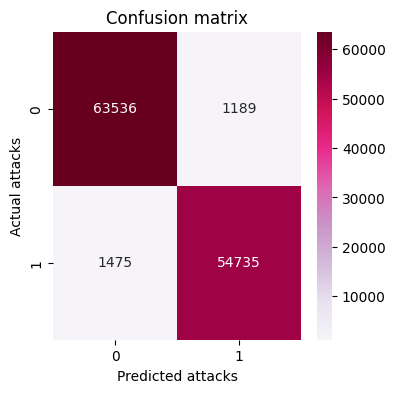

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_Abnormal_test = np.nan_to_num(X_Abnormal_test)


Y_Abnormal_pred=clf_KNN_Abnormal.predict(X_Abnormal_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_Abnormal_test, Y_Abnormal_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Cross Validation: Accuracy, Precision, Recall, F-measure**

**Abnormal**

In [ ]:
cm_res = np.array2string(confusion)
print(confusion)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report( Y_Abnormal_test, Y_Abnormal_pred, target_names=target_names)
print(class_rep_res)

[[63536  1189]
 [ 1475 54735]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98     64725
      normal       0.98      0.97      0.98     56210

    accuracy                           0.98    120935
   macro avg       0.98      0.98      0.98    120935
weighted avg       0.98      0.98      0.98    120935



# SVM


In [ ]:
from sklearn.svm import SVC

clf_SVM_Abnormal=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_Abnormal.fit(X_Abnormal, Y_Abnormal.astype(int))

SVC(kernel='linear', random_state=0)

**Abnormal**

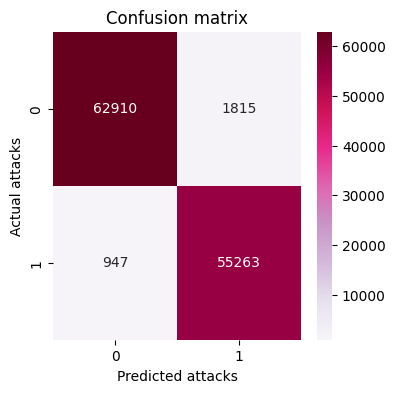

In [ ]:
Y_Abnormal_pred=clf_SVM_Abnormal.predict(X_Abnormal_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_Abnormal_test, Y_Abnormal_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Abnormal**

In [ ]:
cm_res = np.array2string(confusion)
print(confusion)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report( Y_Abnormal_test, Y_Abnormal_pred, target_names=target_names)
print(class_rep_res)

[[62910  1815]
 [  947 55263]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     64725
      normal       0.97      0.98      0.98     56210

    accuracy                           0.98    120935
   macro avg       0.98      0.98      0.98    120935
weighted avg       0.98      0.98      0.98    120935



# Deep Learning using LSTM

**Deep Learning Model using large training dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading data
data_train = pd.read_csv(train_url, header=None)

data_train.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# Defining categorical columns
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'label']

# Data preprocessing
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['label'] == "normal", "label"] = 0
    dataframe.loc[dataframe['label'] != 0, "label"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

# Data scaling
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns=cols)
    return std_df

# Data preprocessing
scaled_train = preprocess(data_train)

In [ ]:
data_train.head()

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,label,duration,src_bytes,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,tcp,ftp_data,SF,0,0,0,0,0,0.0,1.619565,...,-0.155102,-0.357895,0.142857,2.833333,0.0,0.00,0.00,0.05,0.00,0.000000
1,udp,other,SF,0,0,0,0,0,0.0,0.369565,...,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,-1.666667
2,tcp,private,S0,0,0,0,0,1,0.0,-0.159420,...,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,-0.333333
3,tcp,http,SF,0,1,0,0,0,0.0,0.681159,...,0.783673,0.515789,-0.285714,0.500000,2.0,0.03,0.01,0.00,0.01,0.333333
4,tcp,http,SF,0,1,0,0,0,0.0,0.561594,...,0.783673,0.515789,-0.285714,0.000000,0.0,0.00,0.00,0.00,0.00,0.333333


In [ ]:
scaled_train.head()

,land,logged_in,is_host_login,is_guest_login,label,duration,src_bytes,dst_bytes,wrong_fragment,urgent,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0.0,1.619565,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0.0,0.369565,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0.0,-0.159420,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0.0,0.681159,15.800388,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0.0,0.561594,0.813953,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:


# Separation of data into features and labels
x = scaled_train.drop(['label'], axis=1).values
y = scaled_train['label'].values

# Dimension reduction with PCA
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

# Converting labels to integers
y = y.astype('int')

# Separating data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.96, random_state=42)

# Defining the RNN model architecture
model = Sequential()
model.add(LSTM(units=32, input_shape=(x_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(x_train.reshape((x_train.shape[0], x_train.shape[1], 1)), y_train, epochs=10, batch_size=32,
                    validation_data=(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test))

Number of original features is 123 and of reduced features is 20
Epoch 1/10
158/158 [==============================] - 11s 57ms/step - loss: 0.4371 - accuracy: 0.7640 - val_loss: 0.2269 - val_accuracy: 0.8987
Epoch 2/10
158/158 [==============================] - 8s 54ms/step - loss: 0.2192 - accuracy: 0.9162 - val_loss: 0.3762 - val_accuracy: 0.8550
Epoch 3/10
158/158 [==============================] - 9s 55ms/step - loss: 0.1836 - accuracy: 0.9367 - val_loss: 0.1681 - val_accuracy: 0.9421
Epoch 4/10
158/158 [==============================] - 8s 54ms/step - loss: 0.1618 - accuracy: 0.9446 - val_loss: 0.1586 - val_accuracy: 0.9439
Epoch 5/10
158/158 [==============================] - 8s 53ms/step - loss: 0.1460 - accuracy: 0.9496 - val_loss: 0.1553 - val_accuracy: 0.9444
Epoch 6/10
158/158 [==============================] - 8s 54ms/step - loss: 0.1445 - accuracy: 0.9480 - val_loss: 0.1333 - val_accuracy: 0.9545
Epoch 7/10
158/158 [==============================] - 8s 53ms/step - loss: 0

3780/3780 [==============================] - 7s 2ms/step


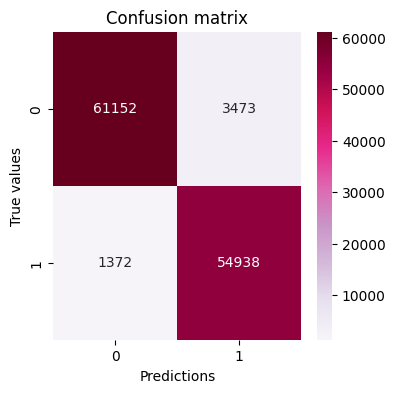

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediction using test data
y_pred = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)))
y_pred = (y_pred > 0.5)

# Confusion matrix calculation
confusion = confusion_matrix(y_test, y_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

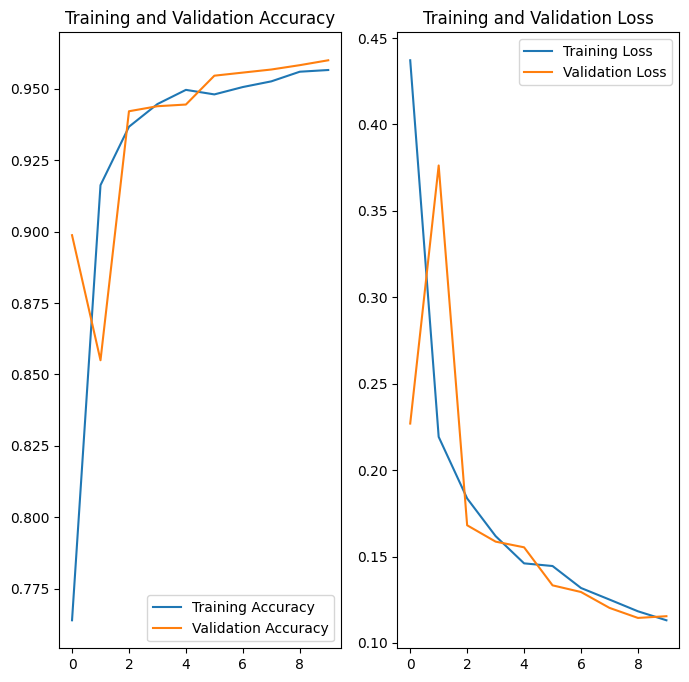

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cm_res = np.array2string(confusion)
print(confusion)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(class_rep_res)

[[61152  3473]
 [ 1372 54938]]
Classification Report
              precision    recall  f1-score   support

    abnormal     0.9781    0.9463    0.9619     64625
      normal     0.9405    0.9756    0.9578     56310

    accuracy                         0.9599    120935
   macro avg     0.9593    0.9609    0.9598    120935
weighted avg     0.9606    0.9599    0.9600    120935

